# UMAP 降维示例
本示例生成带有标签的100维合成向量，首先使用PCA投影到2D进行可视化（代表原始100D数据的粗略2D视图），然后使用UMAP降维到3维，并使用3D散点图进行可视化。

所需库：numpy, scikit-learn, umap-learn, plotly, pandas。如果环境中缺少，请在笔记本中安装它们。

X shape: (200, 100) labels shape: (200,)


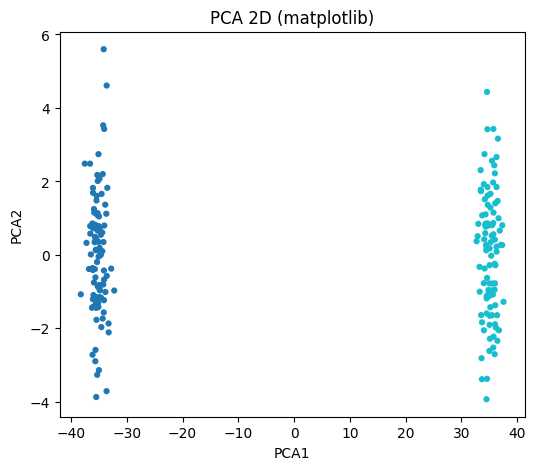

In [1]:
# 如果你需要安装依赖，请取消下一行注释并运行（在 Jupyter 中）：
# !pip install numpy scikit-learn umap-learn plotly pandas

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from umap import UMAP
import plotly.express as px
import matplotlib.pyplot as plt

# 生成合成数据：100 维，2 个簇，每簇 100 个样本（共 200）
rng = np.random.RandomState(42)
n_clusters = 2
n_per_cluster = 100
n_samples = n_clusters * n_per_cluster # 200
n_features = 100
centers = rng.normal(scale=5.0, size=(n_clusters, n_features))  # 2 个中心
X = np.zeros((n_samples, n_features))
y = np.zeros(n_samples, dtype=int)
for i in range(n_clusters):
    start = i * n_per_cluster
    end = start + n_per_cluster
    X[start:end] = centers[i] + rng.normal(scale=1.0, size=(n_per_cluster, n_features))
    y[start:end] = i

print('X shape:', X.shape, 'labels shape:', y.shape)

# 使用 PCA 将 100 维投影到 2D 用作“原始空间的可视化”
pca = PCA(n_components=2, random_state=42)
X_pca2 = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca2, columns=['PCA1','PCA2'])
df_pca['label'] = y.astype(str)

fig = px.scatter(df_pca, x='PCA1', y='PCA2', color='label', title='PCA 2D of 100-d data (for visualization)')
fig.show()

# 也用 matplotlib 简单显示（可选）
plt.figure(figsize=(6,5))
scatter = plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap='tab10', s=12)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA 2D (matplotlib)')
plt.show()

In [2]:
# 使用 UMAP 将数据降到 3 维并使用 Plotly 做 3D 可视化
reducer = UMAP(n_components=3, random_state=42)
X_umap3 = reducer.fit_transform(X)
print('UMAP 3D result shape:', X_umap3.shape)

df_umap = pd.DataFrame(X_umap3, columns=['UMAP1','UMAP2','UMAP3'])
df_umap['label'] = y.astype(str)

fig3d = px.scatter_3d(df_umap, x='UMAP1', y='UMAP2', z='UMAP3', color='label',
                    title='UMAP 3D of 100-d data', width=900, height=700, opacity=0.8)
fig3d.show()

# 如果你想将 UMAP 结果保存为 CSV 以便离线查看：
# df_umap.to_csv('umap_3d_results.csv', index=False)

/root/miniconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/root/miniconda3/lib/python3.12/site-packages/numba/np/ufunc/parallel.py:373: NumbaWarning:

The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.



UMAP 3D result shape: (200, 3)


原始 100 维向量的余弦相似度矩阵：
[[ 1.          0.95481033  0.95939261 -0.1728643  -0.15987856]
 [ 0.95481033  1.          0.95529301 -0.16234486 -0.16028402]
 [ 0.95939261  0.95529301  1.         -0.18977393 -0.17647943]
 [-0.1728643  -0.16234486 -0.18977393  1.          0.95447335]
 [-0.15987856 -0.16028402 -0.17647943  0.95447335  1.        ]]

UMAP 降维后 3 维向量的余弦相似度矩阵：
[[ 1.          0.9920073   0.99953    -0.30033436 -0.2764752 ]
 [ 0.9920073   1.          0.9953243  -0.32113075 -0.29576284]
 [ 0.99953     0.9953243   0.99999994 -0.31167594 -0.2874869 ]
 [-0.30033436 -0.32113075 -0.31167594  0.9999999   0.99957615]
 [-0.2764752  -0.29576284 -0.2874869   0.99957615  1.0000001 ]]

相似度差异矩阵（原始 - UMAP）：
[[2.22044605e-16 3.71969814e-02 4.01374084e-02 1.27470068e-01
  1.16596626e-01]
 [3.71969814e-02 0.00000000e+00 4.00313014e-02 1.58785894e-01
  1.35478822e-01]
 [4.01374084e-02 4.00313014e-02 5.96046443e-08 1.21902003e-01
  1.11007480e-01]
 [1.27470068e-01 1.58785894e-01 1.21902003e-01 1.19209289e-07


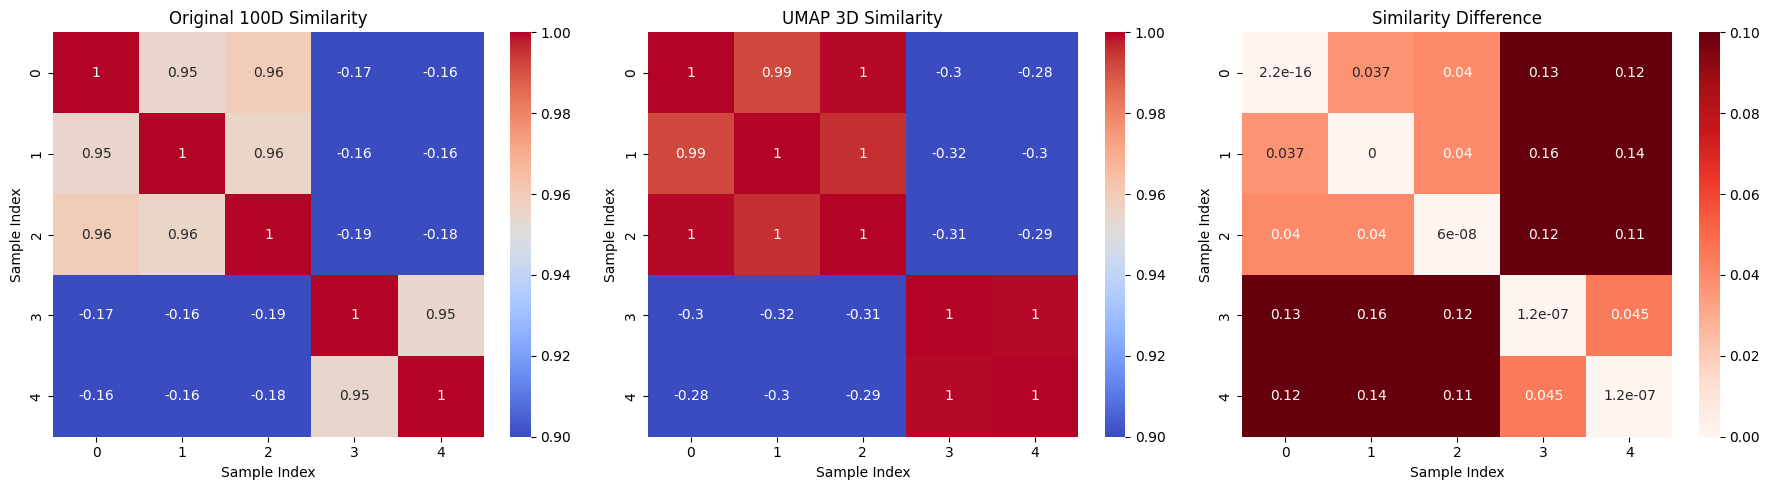

In [3]:
# 计算向量相似度：比较降维前后的余弦相似度
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 随机选择 5 个样本进行比较
sample_indices = rng.choice(n_samples, size=5, replace=False)
X_sample = X[sample_indices]
X_umap_sample = X_umap3[sample_indices]

# 计算原始 100 维向量的余弦相似度
cos_sim_original = cosine_similarity(X_sample)
print("原始 100 维向量的余弦相似度矩阵：")
print(cos_sim_original)

# 计算 UMAP 降维后 3 维向量的余弦相似度
cos_sim_umap = cosine_similarity(X_umap_sample)
print("\nUMAP 降维后 3 维向量的余弦相似度矩阵：")
print(cos_sim_umap)

# 计算相似度差异（绝对差值）
diff = np.abs(cos_sim_original - cos_sim_umap)
print("\n相似度差异矩阵（原始 - UMAP）：")
print(diff)

# 计算平均相似度保留率（对角线为 1，比较非对角线）
avg_diff = np.mean(diff[np.triu_indices_from(diff, k=1)])
print(f"\n平均相似度差异（非对角线）：{avg_diff:.4f}")
print("差异越小，表示降维后相似度保留得越好。")

# 可视化相似度矩阵
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 原始相似度 heatmap
sns.heatmap(cos_sim_original, annot=True, cmap='coolwarm', ax=axes[0], vmin=0.9, vmax=1.0)
axes[0].set_title('Original 100D Similarity')
axes[0].set_xlabel('Sample Index')
axes[0].set_ylabel('Sample Index')

# UMAP 相似度 heatmap
sns.heatmap(cos_sim_umap, annot=True, cmap='coolwarm', ax=axes[1], vmin=0.9, vmax=1.0)
axes[1].set_title('UMAP 3D Similarity')
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Sample Index')

# 差异 heatmap
sns.heatmap(diff, annot=True, cmap='Reds', ax=axes[2], vmin=0, vmax=0.1)
axes[2].set_title('Similarity Difference')
axes[2].set_xlabel('Sample Index')
axes[2].set_ylabel('Sample Index')

plt.tight_layout()
plt.show()

原始 100 维向量的欧几里得距离矩阵：
[[ 0.         14.35555284 72.65511137 70.51381642 70.60905873]
 [14.35555284  0.         70.93229828 68.5891235  68.39783144]
 [72.65511137 70.93229828  0.         14.39804831 14.66603825]
 [70.51381642 68.5891235  14.39804831  0.         12.94592084]
 [70.60905873 68.39783144 14.66603825 12.94592084  0.        ]]

UMAP 降维后 3 维向量的欧几里得距离矩阵：
[[ 0.          0.76259357 18.715717   19.085367   18.47125   ]
 [ 0.76259357  0.         18.76317    19.162037   18.557228  ]
 [18.715717   18.76317     0.          0.8301041   0.9883562 ]
 [19.085367   19.162037    0.8301041   0.          0.65648186]
 [18.47125    18.557228    0.9883562   0.65648186  0.        ]]

距离差异矩阵（原始 - UMAP）：
[[ 0.         13.59295928 53.93939406 51.42844922 52.1378082 ]
 [13.59295928  0.         52.16912804 49.4270866  49.84060335]
 [53.93939406 52.16912804  0.         13.5679442  13.67768208]
 [51.42844922 49.4270866  13.5679442   0.         12.28943898]
 [52.1378082  49.84060335 13.67768208 12.28943898

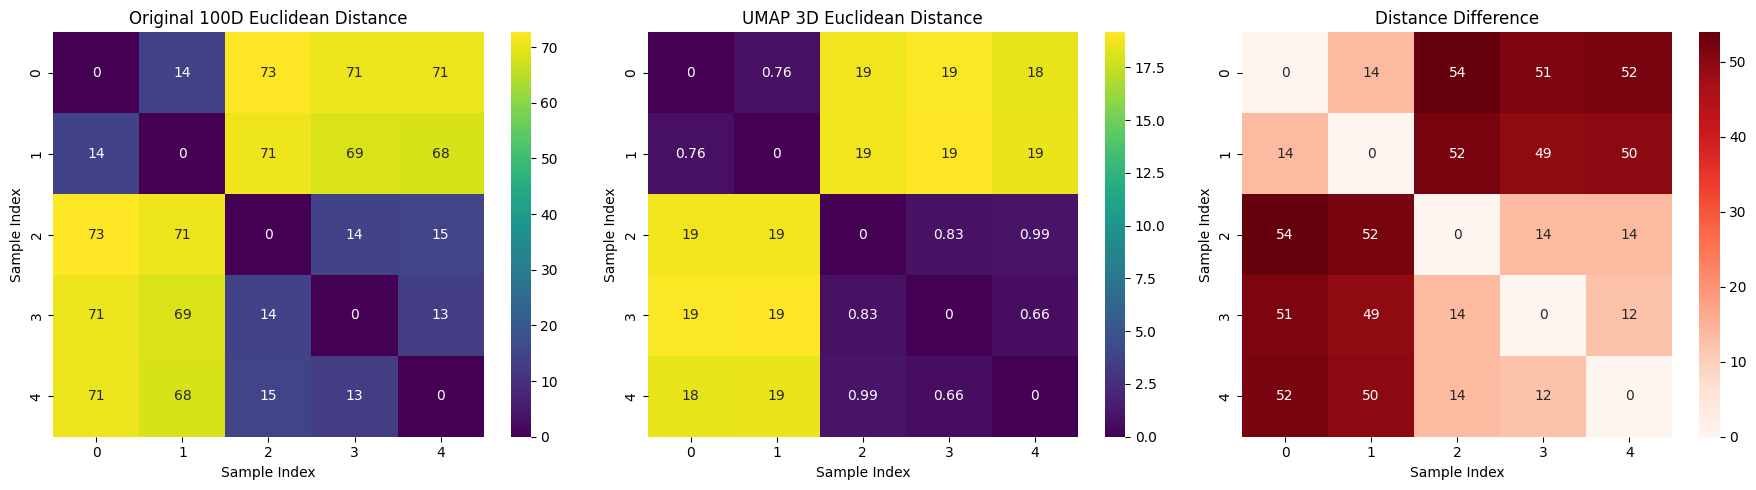

In [4]:
# 计算降维前后的向量距离变化（欧几里得距离）
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 选择前 5 个样本进行比较（可调整）
sample_indices = rng.choice(n_samples, size=5, replace=False)
X_sample = X[sample_indices]
X_umap_sample = X_umap3[sample_indices]

# 计算原始 100 维向量的欧几里得距离
dist_original = euclidean_distances(X_sample)
print("原始 100 维向量的欧几里得距离矩阵：")
print(dist_original)

# 计算 UMAP 降维后 3 维向量的欧几里得距离
dist_umap = euclidean_distances(X_umap_sample)
print("\nUMAP 降维后 3 维向量的欧几里得距离矩阵：")
print(dist_umap)

# 计算距离差异（绝对差值）
dist_diff = np.abs(dist_original - dist_umap)
print("\n距离差异矩阵（原始 - UMAP）：")
print(dist_diff)

# 计算平均距离差异（非对角线）
avg_dist_diff = np.mean(dist_diff[np.triu_indices_from(dist_diff, k=1)])
print(f"\n平均距离差异（非对角线）：{avg_dist_diff:.4f}")
print("差异越小，表示降维后距离保留得越好。")

# 可视化距离矩阵
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 原始距离 heatmap
sns.heatmap(dist_original, annot=True, cmap='viridis', ax=axes[0])
axes[0].set_title('Original 100D Euclidean Distance')
axes[0].set_xlabel('Sample Index')
axes[0].set_ylabel('Sample Index')

# UMAP 距离 heatmap
sns.heatmap(dist_umap, annot=True, cmap='viridis', ax=axes[1])
axes[1].set_title('UMAP 3D Euclidean Distance')
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Sample Index')

# 距离差异 heatmap
sns.heatmap(dist_diff, annot=True, cmap='Reds', ax=axes[2])
axes[2].set_title('Distance Difference')
axes[2].set_xlabel('Sample Index')
axes[2].set_ylabel('Sample Index')

plt.tight_layout()
plt.show()